In [56]:
#Proyecto aplica regresion lineal para calcular riesgo de portafolio a traves del parametro estadistio Beta
# Importamos librerias
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [57]:
#path
data = pd.read_excel('C:\File_direction\data shares python4.xlsx')

In [58]:
# print data
data

,Date,FB,GSPC
0,2016-08-01,0.017589,-0.001219
1,2016-09-01,0.017047,-0.001234
2,2016-10-01,0.021205,-0.019426
3,2016-11-01,-0.095962,0.034175
4,2016-12-01,-0.028458,0.018201
5,2017-01-01,0.132725,0.017884
6,2017-02-01,0.040055,0.037198
7,2017-03-01,0.048030,-0.000389
8,2017-04-01,0.057726,0.009091
9,2017-05-01,0.008053,0.011576


In [33]:
data[['FB', 'GSPC']]

,FB,GSPC
0,0.016904,-0.001235
1,0.020984,-0.019617
2,-0.100883,0.033604
3,-0.028871,0.018037
4,0.124626,0.017726
5,0.039274,0.036523
6,0.046912,-0.000389
7,0.056121,0.009050
8,0.008021,0.011510
9,-0.003174,0.004802


In [59]:
X=data['GSPC']
Y=data['FB']

In [60]:
X

0    -0.001219
1    -0.001234
2    -0.019426
3     0.034175
4     0.018201
5     0.017884
6     0.037198
7    -0.000389
8     0.009091
9     0.011576
10    0.004814
11    0.019349
12    0.000546
13    0.019303
14    0.022188
15    0.003720
16    0.034343
17    0.056179
18   -0.038947
19   -0.026884
20    0.002719
21    0.021608
22    0.004842
23    0.036022
24    0.030263
25    0.004294
26   -0.069403
27    0.017859
28   -0.091777
29    0.078684
30    0.029729
31    0.017924
32    0.039313
33   -0.065778
34    0.068930
35    0.013128
Name: GSPC, dtype: float64

In [61]:
Y

0     0.017589
1     0.017047
2     0.021205
3    -0.095962
4    -0.028458
5     0.132725
6     0.040055
7     0.048030
8     0.057726
9     0.008053
10   -0.003169
11    0.121009
12    0.016071
13   -0.006396
14    0.053784
15   -0.015995
16   -0.004064
17    0.059107
18   -0.045856
19   -0.103914
20    0.076413
21    0.115000
22    0.013244
23   -0.111877
24    0.018252
25   -0.064132
26   -0.077040
27   -0.073654
28   -0.067705
29    0.271569
30   -0.031436
31    0.032456
32    0.160238
33   -0.082368
34    0.087508
35    0.006373
Name: FB, dtype: float64

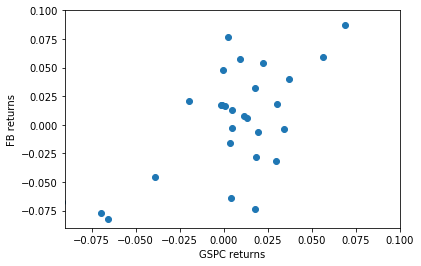

In [62]:
plt.scatter(X,Y)
plt.axis([-0.09,0.1,-0.09,0.1])
plt.ylabel('FB returns')
plt.xlabel('GSPC returns')
plt.show()

In [63]:
#agrego la constante
X1=sm.add_constant(X)
reg=sm.OLS(Y,X1).fit()

In [64]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FB   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     14.35
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           0.000591
Time:                        13:48:18   Log-Likelihood:                 46.227
No. Observations:                  36   AIC:                            -88.45
Df Residuals:                      34   BIC:                            -85.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.012      0.313      0.756      -0.020       0.028
GSPC           1.2605      0.333      3.789      0.001       0.584       1.937
==============================================================================
Omnibus:                        1.168   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.346
Skew:                          -0.031   Prob(JB):                        0.841
Kurtosis:                       3.476   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#llamar a algunos resultados de la regresión
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [66]:
slope

1.2605116644375223

In [67]:
cov = data.cov()*250
cov

,FB,GSPC
FB,1.641752,0.386647
GSPC,0.386647,0.306738


In [68]:
#en la matriz cov, obtener el elemento 0,1 
cov_with_market=cov.iloc[0,1]
cov_with_market

0.3866472205405923

In [70]:
# obtener la varianza de SP500 (GSPC)
# calculo de varianza anualizada de los retornos 
# se puede ir a yohoo finance para hacer un check del beta encontrado
market_var=data['GSPC'].var()*250
market_var

0.30673831226554005

In [71]:
# calculo del beta
#PG is a defensive stock, su beta es menor que 1

FB_beta = cov_with_market/market_var
FB_beta

1.2605116644375223